**Técnica de regularização usada em deep learning para prevenir overfitting adicionando um termo de penalidade à função de perda.**

Existem vários tipos de técnicas de regularização para redes neurais.




# Explorando o Overfitting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_moons

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
input_, target_ = make_moons(200, noise=0.25,random_state=2)

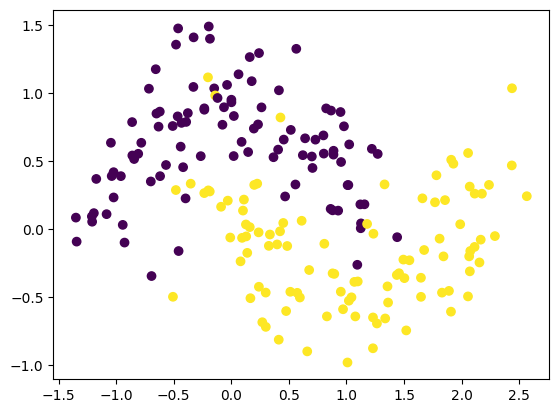

In [ ]:
plt.scatter(x = input_[:,0], y = input_[:,1], c=target_)
plt.show()

In [ ]:
model_1 = Sequential()
model_1.add(Input(shape=(2,)))
model_1.add(Dense(128,activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1,activation='sigmoid'))

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_1 = model_1.fit(input_, target_, epochs=500, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


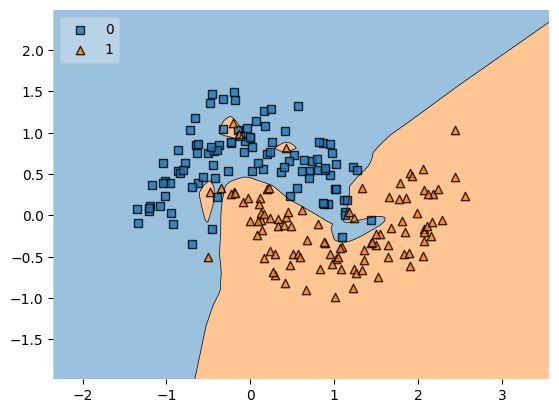

In [ ]:
plot_decision_regions(input_, target_.astype('int'), clf=model_1, legend=2)
plt.show()

# Evidenciando o overfitting

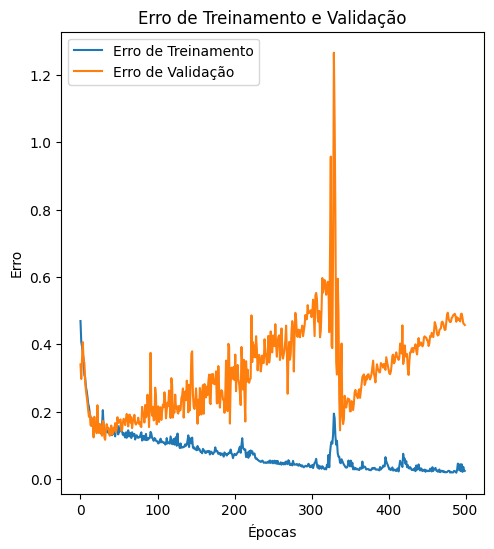

In [ ]:
# Plotando o erro de treinamento e validação
plt.figure(figsize=(12, 6))

# Plotando a perda (loss)
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Erro de Treinamento')
plt.plot(history_1.history['val_loss'], label='Erro de Validação')
plt.title('Erro de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()

Existem várias técnicas de regularização usadas em deep learning para prevenir overfitting e melhorar a capacidade de generalização dos modelos. Aqui estão algumas das mais comuns:

### 1. Regularização L2 (Ridge)
- **Descrição**: Adiciona um termo de penalidade à função de perda que é proporcional ao quadrado da magnitude dos coeficientes dos pesos.
- **Como é usada**: Mantém os pesos pequenos, penalizando grandes valores de pesos. Isso ajuda a evitar que o modelo se ajuste demais aos dados de treinamento.
- **Implementação no Keras**:
  ```python
  from keras.regularizers import l2
  model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.1)))
  ```

### 2. Regularização L1 (Lasso)
- **Descrição**: Adiciona um termo de penalidade à função de perda que é proporcional ao valor absoluto dos coeficientes dos pesos.
- **Como é usada**: Promove a esparsidade dos pesos, resultando em muitos pesos sendo zero. Isso pode ser útil para selecionar características importantes.
- **Implementação no Keras**:
  ```python
  from keras.regularizers import l1
  model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.1)))
  ```

### 3. Dropout
- **Descrição**: Desativa aleatoriamente uma fração dos neurônios durante o treinamento em cada iteração.
- **Como é usada**: Ajuda a evitar overfitting ao introduzir ruído no processo de treinamento, forçando a rede a aprender representações mais robustas.
- **Implementação no Keras**:
  ```python
  from keras.layers import Dropout
  model.add(Dropout(0.2))
  ```

### 4. Early Stopping
- **Descrição**: Interrompe o treinamento quando a performance no conjunto de validação começa a piorar.
- **Como é usada**: Evita que o modelo treine por muito tempo e comece a se ajustar demais aos dados de treinamento.
- **Implementação no Keras**:
  ```python
  from keras.callbacks import EarlyStopping
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])
  ```

### 5. Data Augmentation
- **Descrição**: Gera novas amostras de dados de treinamento aplicando transformações aleatórias (como rotações, translações, etc.) aos dados existentes.
- **Como é usada**: Aumenta o tamanho do conjunto de dados de treinamento e ajuda a rede a generalizar melhor.
- **Implementação no Keras**:
  ```python
  from keras.preprocessing.image import ImageDataGenerator
  datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
  datagen.fit(x_train)
  ```

Essas técnicas são frequentemente combinadas para obter melhores resultados e evitar overfitting de maneira mais eficaz¹²³.




### 6. `shuffle=True`

- **Embaralhamento dos Dados**: Quando `shuffle=True` é especificado, os dados de entrada são embaralhados aleatoriamente antes de cada época de treinamento. Isso significa que a ordem dos exemplos de treinamento é alterada a cada nova época.

### Por que é importante

1. **Reduzir o Overfitting**:
   - Embaralhar os dados ajuda a evitar que o modelo memorize a ordem dos exemplos de treinamento, o que pode levar ao overfitting. O overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados.

2. **Melhorar a Generalização**:
   - Ao embaralhar os dados, o modelo é exposto a diferentes sequências de exemplos em cada época, o que pode ajudar a melhorar sua capacidade de generalização. Isso significa que o modelo pode aprender padrões mais robustos e aplicáveis a novos dados.

3. **Evitar Padrões Indesejados**:
   - Se os dados de treinamento estiverem ordenados de uma maneira específica (por exemplo, todas as imagens de gatos seguidas por todas as imagens de cachorros), o modelo pode aprender padrões indesejados baseados na ordem dos dados. Embaralhar os dados ajuda a evitar isso.

### Exemplo de Uso

Aqui está um exemplo de como `shuffle=True` pode ser usado ao treinar um modelo com Keras:

```python
model.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True)
```

- **fit**: Método usado para treinar o modelo.
- **X_train, y_train**: Dados de entrada e rótulos de treinamento.
- **epochs=10**: Número de épocas de treinamento.
- **batch_size=32**: Tamanho do lote.
- **shuffle=True**: Embaralha os dados antes de cada época.


O parâmetro `shuffle=True` é uma prática comum e recomendada no treinamento de modelos de machine learning, pois ajuda a melhorar a generalização do modelo e a evitar overfitting, embaralhando os dados de entrada antes de cada época de treinamento.



### L2 Regularization

In [ ]:
model_2 = Sequential()
model_2.add(Input(shape=(2,)))
model_2.add(Dense(128,activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model_2.add(Dense(128, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model_2.add(Dense(1,activation='sigmoid'))

model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model_2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_2 = model_2.fit(input_, target_, epochs=500, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


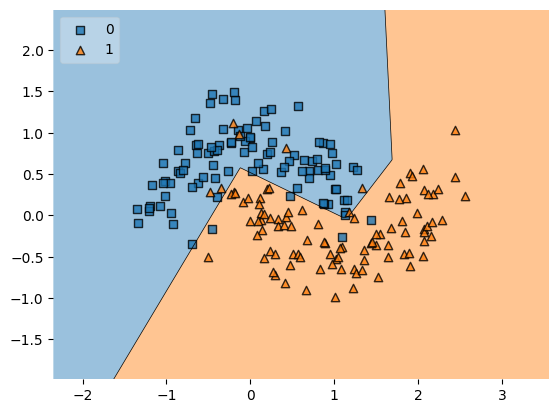

In [ ]:
plot_decision_regions(input_, target_.astype('int'), clf=model_2, legend=2)
plt.show()

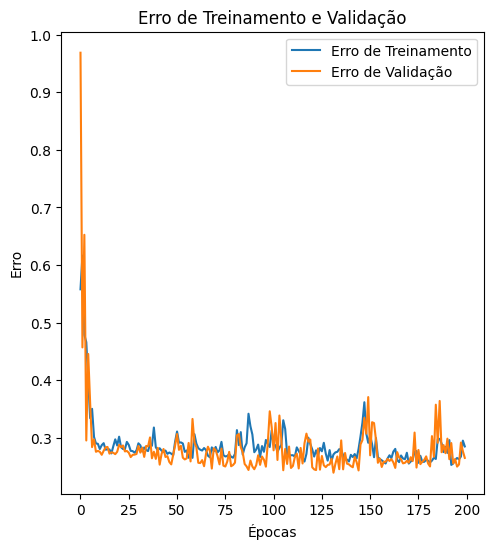

In [ ]:
# Plotando o erro de treinamento e validação
plt.figure(figsize=(12, 6))

# Plotando a perda (loss)
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Erro de Treinamento')
plt.plot(history_2.history['val_loss'], label='Erro de Validação')
plt.title('Erro de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()

verifica-se que o overfitting foi reduzido

## L1 Regularization

In [ ]:
model_3 = Sequential()
model_3.add(Input(shape=(2,)))
model_3.add(Dense(128,activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_3.add(Dense(128, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_3.add(Dense(1,activation='sigmoid'))

model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model_3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(input_, target_, epochs=500, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


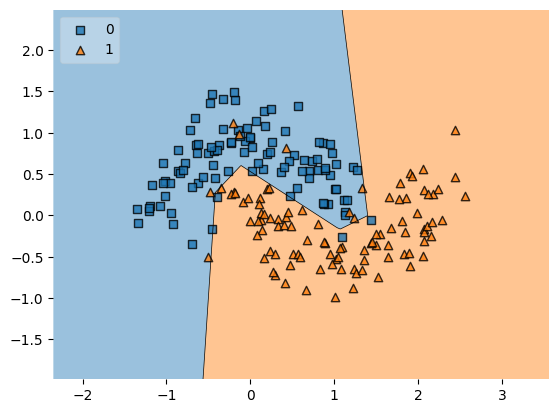

In [ ]:
plot_decision_regions(input_, target_.astype('int'), clf=model_3, legend=2)
plt.show()

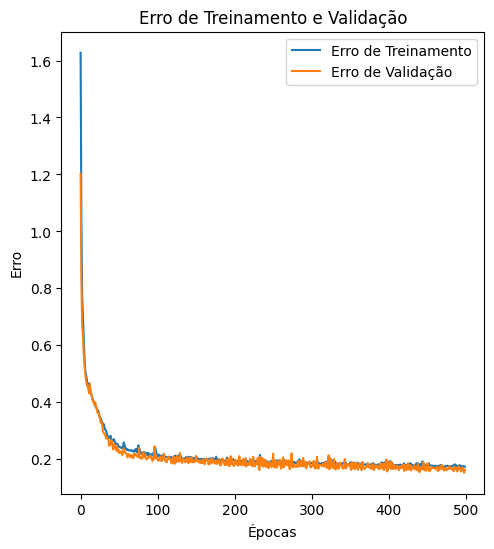

In [ ]:
# Plotando o erro de treinamento e validação
plt.figure(figsize=(12, 6))

# Plotando a perda (loss)
plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Erro de Treinamento')
plt.plot(history_3.history['val_loss'], label='Erro de Validação')
plt.title('Erro de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()

Melhorou bastante